In [1]:
import numpy as np
import pandas as pd

In [2]:
test_df = pd.read_csv('./Data/act_test.csv')
test_df.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10
0,ppl_100004,act1_249281,2022-07-20,type 1,type 5,type 10,type 5,type 1,type 6,type 1,type 1,type 7,type 4,NaN
1,ppl_100004,act2_230855,2022-07-20,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 682
2,ppl_10001,act1_240724,2022-10-14,type 1,type 12,type 1,type 5,type 4,type 6,type 1,type 1,type 13,type 10,NaN
3,ppl_10001,act1_83552,2022-11-27,type 1,type 20,type 10,type 5,type 4,type 6,type 1,type 1,type 5,type 5,NaN
4,ppl_10001,act2_1043301,2022-10-15,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 3015


In [3]:
train_df = pd.read_csv('./Data/act_train.csv')
train_df.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0


In [4]:
people_df = pd.read_csv('./Data/people.csv')
people_df.head()

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,...,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,...,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,...,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,...,False,False,True,False,False,False,True,True,False,84


## Preprocessing the Input data sets

In [5]:
# since the data columns are similar in
people_df['date'] = pd.to_datetime(people_df['date'])
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])

In [6]:
# Convert similarly named terms in the two datasets ...
# ppl = people_df.rename(columns=dict({name: '_'.join(['ppl', name]) for name in people_df.columns if 'char' in name},
#                                     **{'date': 'ppl_date', 'group_1': 'ppl_group', 'people_id': 'ppl_id'}))

In [7]:
# activ = train_df.rename(columns=dict({name: '_'.join(['act', name]) for name in train_df.columns if 'char' in name},
#                                      **{'activity_category': 'act_category', 'date': 'act_date',
#                                         'activity_id': 'act_id', 'outcome': 'act_outcome', 'people_id': 'ppl_id'}))
# activ.columns

In [8]:
people_df

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,...,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,...,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,...,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,...,False,False,True,False,False,False,True,True,False,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189113,ppl_99987,type 1,group 8600,type 1,2022-04-02,type 4,type 6,type 4,type 3,type 11,...,False,False,False,True,False,True,False,True,True,89
189114,ppl_9999,type 2,group 17304,type 2,2023-02-23,type 6,type 2,type 8,type 3,type 11,...,False,False,False,False,False,False,False,False,False,0
189115,ppl_99992,type 2,group 17304,type 2,2020-06-25,type 5,type 5,type 3,type 4,type 16,...,False,False,False,False,False,False,False,False,False,0
189116,ppl_99994,type 2,group 17764,type 3,2023-01-06,type 2,type 7,type 2,type 1,type 2,...,True,True,True,True,False,True,True,True,True,95


In [9]:
train_df.columns

Index(['people_id', 'activity_id', 'date', 'activity_category', 'char_1',
       'char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8',
       'char_9', 'char_10', 'outcome'],
      dtype='object')

In [10]:
## Renaming the similarly named columns keeping primary and foreign key consistent :
people_df.columns = ['ppl_' + str(col) for col in people_df.columns]
people_df.rename(columns={'ppl_people_id': 'people_id', 'ppl_group_1': 'ppl_group'}, inplace=True)
train_df.columns = ['act_' + str(col) for col in train_df.columns]
train_df.rename(columns={'act_people_id': 'people_id', 'act_activity_category': 'activity_category',
                         'act_activity_id': 'activity_id', 'act_outcome': 'outcome'}, inplace=True)
test_df.columns = ['act_' + str(col) for col in test_df.columns]
test_df.rename(columns={'act_people_id': 'people_id', 'act_activity_category': 'activity_category',
                        'act_activity_id': 'activity_id', 'act_outcome': 'outcome'}, inplace=True)


In [11]:
people_df.head()

,people_id,ppl_char_1,ppl_group,ppl_char_2,ppl_date,ppl_char_3,ppl_char_4,ppl_char_5,ppl_char_6,ppl_char_7,...,ppl_char_29,ppl_char_30,ppl_char_31,ppl_char_32,ppl_char_33,ppl_char_34,ppl_char_35,ppl_char_36,ppl_char_37,ppl_char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,...,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,...,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,...,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,...,False,False,True,False,False,False,True,True,False,84


In [12]:
train_df.head()

,people_id,activity_id,act_date,activity_category,act_char_1,act_char_2,act_char_3,act_char_4,act_char_5,act_char_6,act_char_7,act_char_8,act_char_9,act_char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0


In [13]:
test_df.head()

,people_id,activity_id,act_date,activity_category,act_char_1,act_char_2,act_char_3,act_char_4,act_char_5,act_char_6,act_char_7,act_char_8,act_char_9,act_char_10
0,ppl_100004,act1_249281,2022-07-20,type 1,type 5,type 10,type 5,type 1,type 6,type 1,type 1,type 7,type 4,NaN
1,ppl_100004,act2_230855,2022-07-20,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 682
2,ppl_10001,act1_240724,2022-10-14,type 1,type 12,type 1,type 5,type 4,type 6,type 1,type 1,type 13,type 10,NaN
3,ppl_10001,act1_83552,2022-11-27,type 1,type 20,type 10,type 5,type 4,type 6,type 1,type 1,type 5,type 5,NaN
4,ppl_10001,act2_1043301,2022-10-15,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 3015


In [14]:
## Checking for null values :
# People dataset
print('People data null values : \n')
print(people_df.isnull().sum())
print('-----------------------------------------------------------------\n')
print('Train data null values : \n')
print(train_df.isnull().sum())
print('-----------------------------------------------------------------\n')
print('Test data null values : \n')
print(test_df.isnull().sum())
print('-----------------------------------------------------------------\n')

People data null values : 

people_id      0
ppl_char_1     0
ppl_group      0
ppl_char_2     0
ppl_date       0
ppl_char_3     0
ppl_char_4     0
ppl_char_5     0
ppl_char_6     0
ppl_char_7     0
ppl_char_8     0
ppl_char_9     0
ppl_char_10    0
ppl_char_11    0
ppl_char_12    0
ppl_char_13    0
ppl_char_14    0
ppl_char_15    0
ppl_char_16    0
ppl_char_17    0
ppl_char_18    0
ppl_char_19    0
ppl_char_20    0
ppl_char_21    0
ppl_char_22    0
ppl_char_23    0
ppl_char_24    0
ppl_char_25    0
ppl_char_26    0
ppl_char_27    0
ppl_char_28    0
ppl_char_29    0
ppl_char_30    0
ppl_char_31    0
ppl_char_32    0
ppl_char_33    0
ppl_char_34    0
ppl_char_35    0
ppl_char_36    0
ppl_char_37    0
ppl_char_38    0
dtype: int64
-----------------------------------------------------------------

Train data null values : 

people_id                  0
activity_id                0
act_date                   0
activity_category          0
act_char_1           2039676
act_char_2           20

In [15]:
test_df.dtypes

people_id                    object
activity_id                  object
act_date             datetime64[ns]
activity_category            object
act_char_1                   object
act_char_2                   object
act_char_3                   object
act_char_4                   object
act_char_5                   object
act_char_6                   object
act_char_7                   object
act_char_8                   object
act_char_9                   object
act_char_10                  object
dtype: object

In [16]:
for column in test_df.columns.to_list()[5:]:
    print(column)
    test_df.loc[test_df[column].isnull(), column] = "type -1"

act_char_2
act_char_3
act_char_4
act_char_5
act_char_6
act_char_7
act_char_8
act_char_9
act_char_10


In [19]:
for column in train_df.columns.to_list()[5:14]:
    print(column)
    train_df.loc[train_df[column].isnull(), column] = "type -1"

act_char_2
act_char_3
act_char_4
act_char_5
act_char_6
act_char_7
act_char_8
act_char_9
act_char_10


In [21]:
# sorting of columns
people_df = people_df[['people_id', 'ppl_date',  'ppl_group', 'ppl_char_1', 'ppl_char_2'] + people_df.columns[5:].to_list()]
# Converting features to category format for People dataset:
people_columns = people_df.columns.to_list()[3:12]
people_df[['ppl_group'] + people_columns] = people_df[['ppl_group'] + people_columns].astype('category')

In [20]:
# Converting features to category format for activity train and test data:
activity_category = test_df.columns.to_list()[3:14]
test_df[activity_category] = test_df[activity_category].astype('category')
train_df[activity_category] = train_df[activity_category].astype('category')

In [23]:
people_df.head()

,people_id,ppl_date,ppl_group,ppl_char_1,ppl_char_2,ppl_char_3,ppl_char_4,ppl_char_5,ppl_char_6,ppl_char_7,...,ppl_char_29,ppl_char_30,ppl_char_31,ppl_char_32,ppl_char_33,ppl_char_34,ppl_char_35,ppl_char_36,ppl_char_37,ppl_char_38
0,ppl_100,2021-06-29,group 17304,type 2,type 2,type 5,type 5,type 5,type 3,type 11,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,2021-01-06,group 8688,type 2,type 3,type 28,type 9,type 5,type 3,type 11,...,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,2022-06-10,group 33592,type 2,type 3,type 4,type 8,type 5,type 2,type 5,...,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,2022-07-20,group 22593,type 2,type 3,type 40,type 25,type 9,type 4,type 16,...,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,2022-07-27,group 6534,type 2,type 3,type 40,type 25,type 9,type 3,type 8,...,False,False,True,False,False,False,True,True,False,84


In [24]:
train_df.head()

,people_id,activity_id,act_date,activity_category,act_char_1,act_char_2,act_char_3,act_char_4,act_char_5,act_char_6,act_char_7,act_char_8,act_char_9,act_char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type 1,0


## Exploratory Data Analysis

In [25]:
# Merging people data and activity train data over people_id:
train_data = pd.merge(people_df,train_df,how ='inner', on = 'people_id')
train_data.head()

,people_id,ppl_date,ppl_group,ppl_char_1,ppl_char_2,ppl_char_3,ppl_char_4,ppl_char_5,ppl_char_6,ppl_char_7,...,act_char_2,act_char_3,act_char_4,act_char_5,act_char_6,act_char_7,act_char_8,act_char_9,act_char_10,outcome
0,ppl_100,2021-06-29,group 17304,type 2,type 2,type 5,type 5,type 5,type 3,type 11,...,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type 76,0
1,ppl_100,2021-06-29,group 17304,type 2,type 2,type 5,type 5,type 5,type 3,type 11,...,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type 1,0
2,ppl_100,2021-06-29,group 17304,type 2,type 2,type 5,type 5,type 5,type 3,type 11,...,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type 1,0
3,ppl_100,2021-06-29,group 17304,type 2,type 2,type 5,type 5,type 5,type 3,type 11,...,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type 1,0
4,ppl_100,2021-06-29,group 17304,type 2,type 2,type 5,type 5,type 5,type 3,type 11,...,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type -1,type 1,0


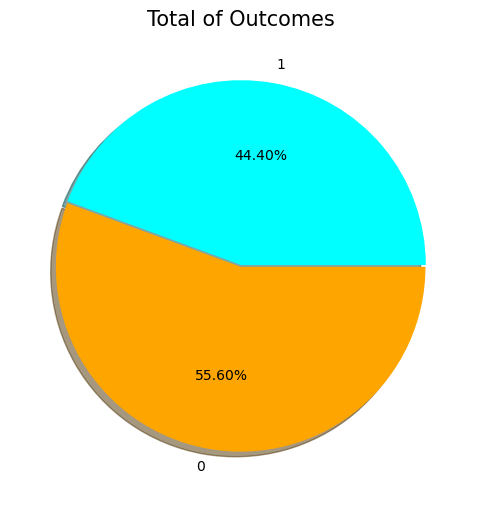

In [33]:
# Outcome bifurcation in train data set
import matplotlib.pyplot as plt
out1= train_data[train_data['outcome']==1].shape[0]
out0= train_data[train_data['outcome']==0].shape[0]

fig,axis = plt.subplots(figsize =(6,6))
axis.tick_params(axis="x", labelsize=16)
axis.tick_params(axis="y", labelsize=32)

axis.pie([out1,out0], labels=['1','0'],explode=(0, 0.01),shadow=True,colors=['cyan','orange'],autopct='%2.2f%%')
plt.title("Total of Outcomes",fontsize=15)
plt.show()

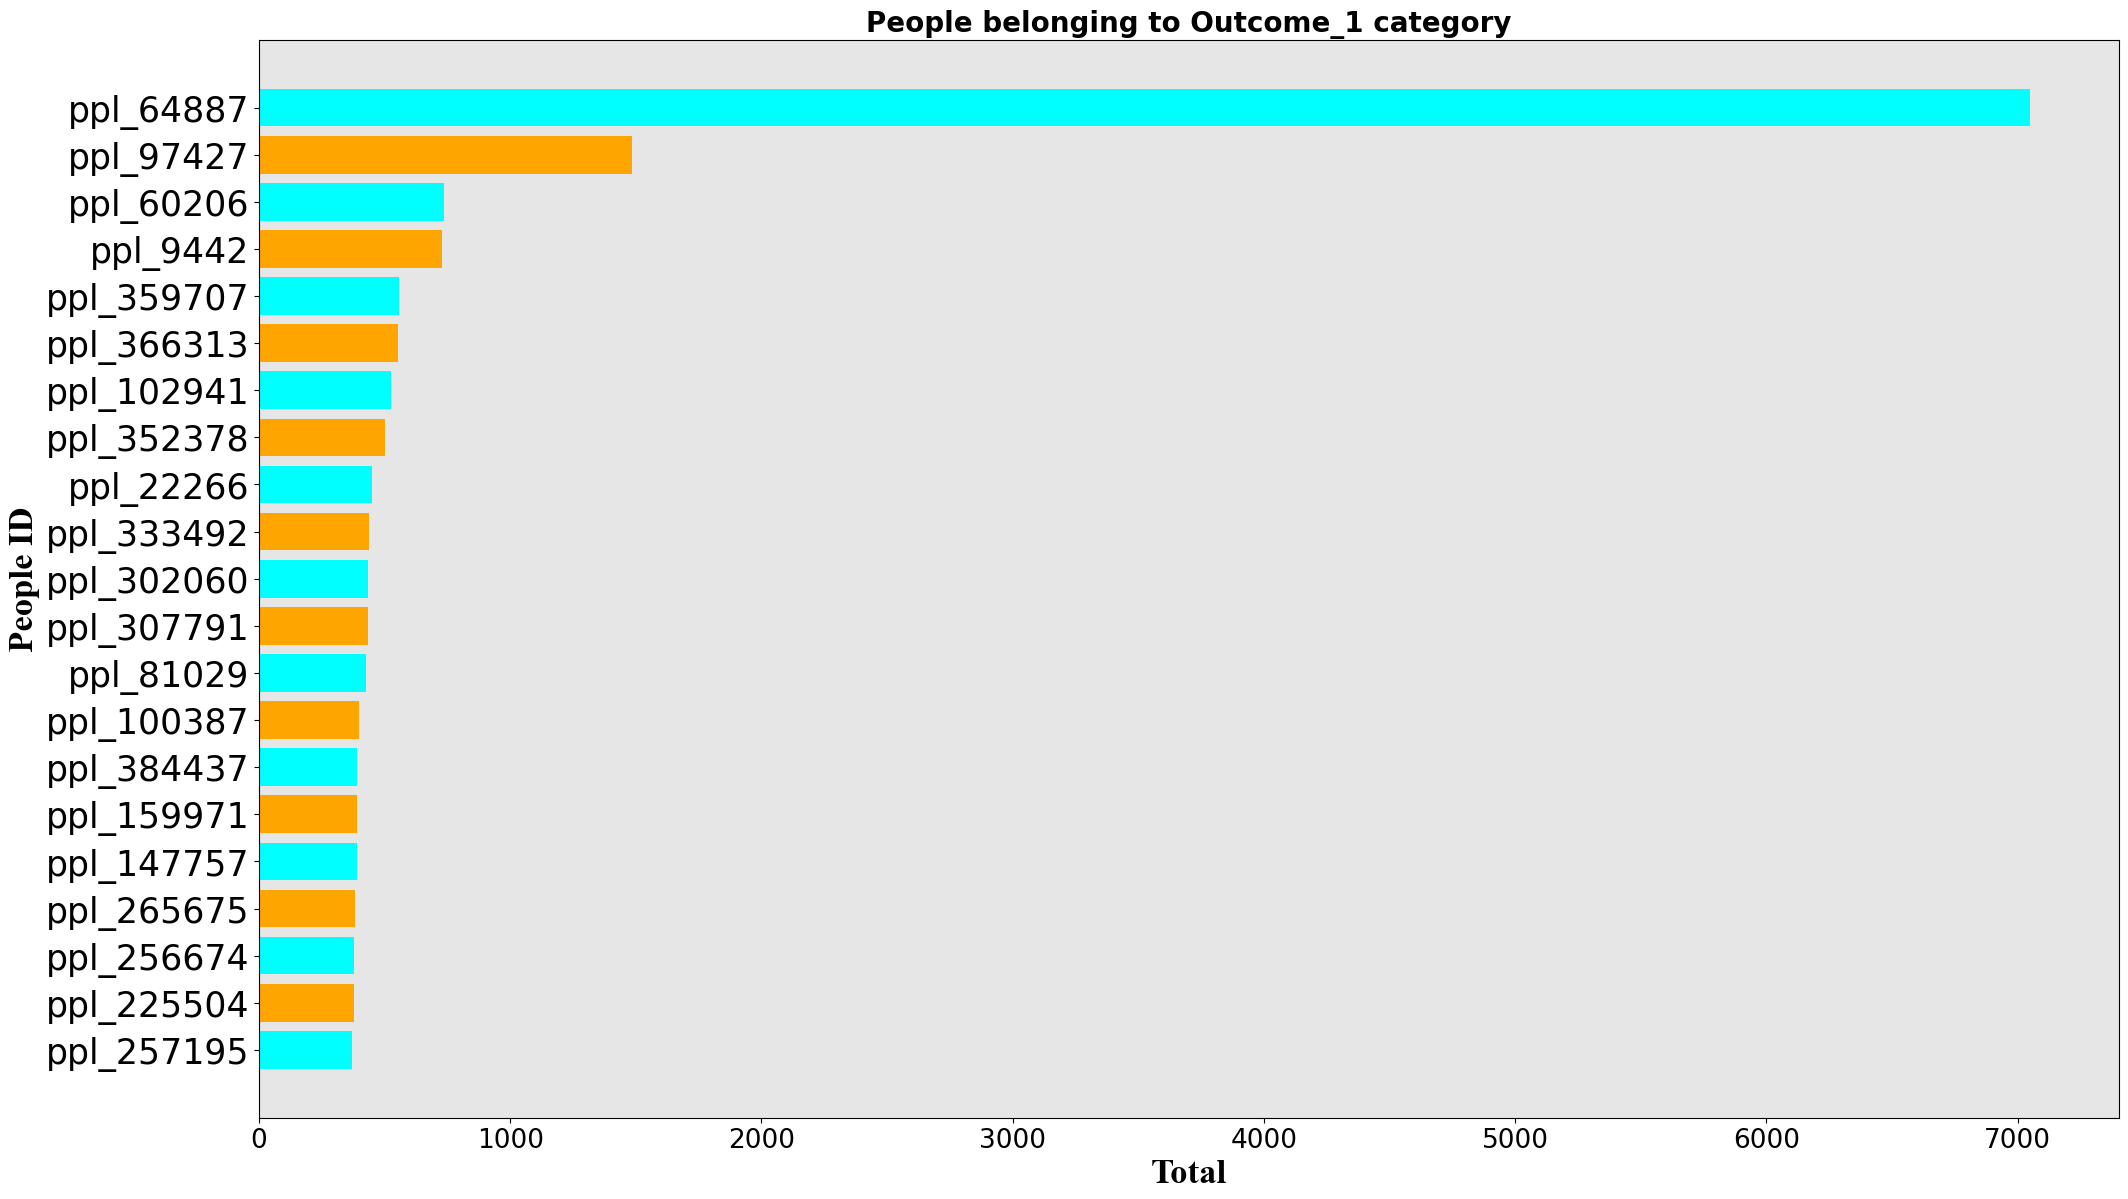

In [50]:
graph_values1 = train_data.loc[train_data['outcome']==1].groupby('people_id')['activity_id'].count().sort_values(ascending=False)[:21]
graph_values1 = graph_values1.sort_values()

fig1,axis1 = plt.subplots(figsize =(24,14))
axis1.tick_params(axis="x", labelsize=19)
axis1.tick_params(axis="y", labelsize=25)

axis1.barh(list(graph_values1.index), list(graph_values1.values),height = 0.8, color = ['cyan','orange'])
axis1.set_facecolor('#E0E0E0')
axis1.patch.set_alpha(0.8)
plt.title("People belonging to Outcome_1 category",fontsize=20,fontweight="bold")
plt.ylabel('People ID',fontsize = 25,fontweight="bold",fontname="Times New Roman")
plt.xlabel('Total',fontsize = 25,fontweight="bold",fontname="Times New Roman")
plt.show()

In [ ]:
graph_values2 = train_data.loc[train_data['outcome']==0].groupby('people_id')['activity_id'].count().sort_values(ascending=False)[:20]
graph_values2 = graph_values2.sort_values()

fig2,axis2 = plt.subplots(figsize =(25,15))
axis2.tick_params(axis="x", labelsize=20)
axis2.tick_params(axis="y", labelsize=30)

axis2.barh(list(graph_values2.index), list(graph_values2.values),height = 0.9, color = ['black','r'])
axis2.set_facecolor('whitesmoke')
axis2.patch.set_alpha(0.9)
plt.title("People Count with Outcome 0",fontsize=30)
plt.ylabel('Gran Prix',fontsize = 20)
plt.xlabel('Total',fontsize = 20,)
plt.show()

In [ ]:
graph_values3 = train_data.loc[train_data['outcome']==0].groupby('activity_category')['activity_id'].count().sort_values(ascending=False)[:20]
graph_values3 = graph_values3.sort_values()

fig3,axis3 = plt.subplots(figsize =(25,15))
axis3.tick_params(axis="x", labelsize=20)
axis3.tick_params(axis="y", labelsize=30)
axis3.barh(list(graph_values3.index), list(graph_values3.values),height = 0.9, color = ['black','r'])
axis3.set_facecolor('whitesmoke')
axis3.patch.set_alpha(0.9)
plt.title("Activity Count with Outcome 0",fontsize=30)
plt.ylabel('Gran Prix',fontsize = 20)
plt.xlabel('Total',fontsize = 20,)
plt.show()

In [ ]:
graph_values4 = train_data.loc[train_data['outcome']==1].groupby('activity_category')['activity_id'].count().sort_values(ascending=False)[:20]
graph_values4 = graph_values4.sort_values()

fig4,axis4 = plt.subplots(figsize =(25,15))
axis4.tick_params(axis="x", labelsize=20)
axis4.tick_params(axis="y", labelsize=30)

axis4.barh(list(graph_values4.index), list(graph_values4.values),height = 0.9, color = ['black','r'])
axis4.set_facecolor('whitesmoke')
axis4.patch.set_alpha(0.9)
plt.title("Activity Count with Outcome 1",fontsize=30)
plt.ylabel('Gran Prix',fontsize = 20)
plt.xlabel('Total',fontsize = 20,)
plt.show()